# CREDIT CARD FRAUD DETECTION

## Library

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from xgboost import XGBClassifier

## Exploratory Data Analysis (EDA)

In [190]:
dataset=pd.read_csv("./creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Checking for any missing values

In [191]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [192]:
dataset.isnull().values.any()

False

### Checking for duplicate rows

In [193]:
dataset.duplicated().sum()

1081

### Checking info of dataset

In [194]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking statistical of the features

In [195]:
dataset.drop("Class",axis=1).describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


### Distribution of the features

In [196]:
data=dataset.drop("Class",axis=1)
data.median()
data.mean()
data.mode()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,163152.0,1.245674,-0.326668,-2.752041,-0.842316,-0.562777,-1.011073,-0.432126,-0.160211,0.170362,...,-0.18037,-0.262581,-0.816264,0.020675,0.357827,0.186423,-0.398828,-0.035866,-0.060282,1.0
1,NaN,2.055797,0.166975,0.488306,0.635322,2.463072,3.173856,0.014953,0.727706,0.608606,...,-0.13208,0.269765,0.844627,0.140304,0.726212,0.366624,0.096544,0.027735,0.018495,NaN


In [197]:
pd.DataFrame({"Median":data.median(),"Mean":data.mean(),"Mode1":data.mode().iloc[0],"Mode2":data.mode().iloc[1]})

,Median,Mean,Mode1,Mode2
Time,84692.000000,9.481386e+04,163152.000000,NaN
V1,0.018109,1.168375e-15,1.245674,2.055797
V2,0.065486,3.416908e-16,-0.326668,0.166975
V3,0.179846,-1.379537e-15,-2.752041,0.488306
V4,-0.019847,2.074095e-15,-0.842316,0.635322
V5,-0.054336,9.604066e-16,-0.562777,2.463072
V6,-0.274187,1.487313e-15,-1.011073,3.173856
V7,0.040103,-5.556467e-16,-0.432126,0.014953
V8,0.022358,1.213481e-16,-0.160211,0.727706
V9,-0.051429,-2.406331e-15,0.170362,0.608606


In [198]:
columns=dataset.columns
columns_dist=columns.drop("Class")

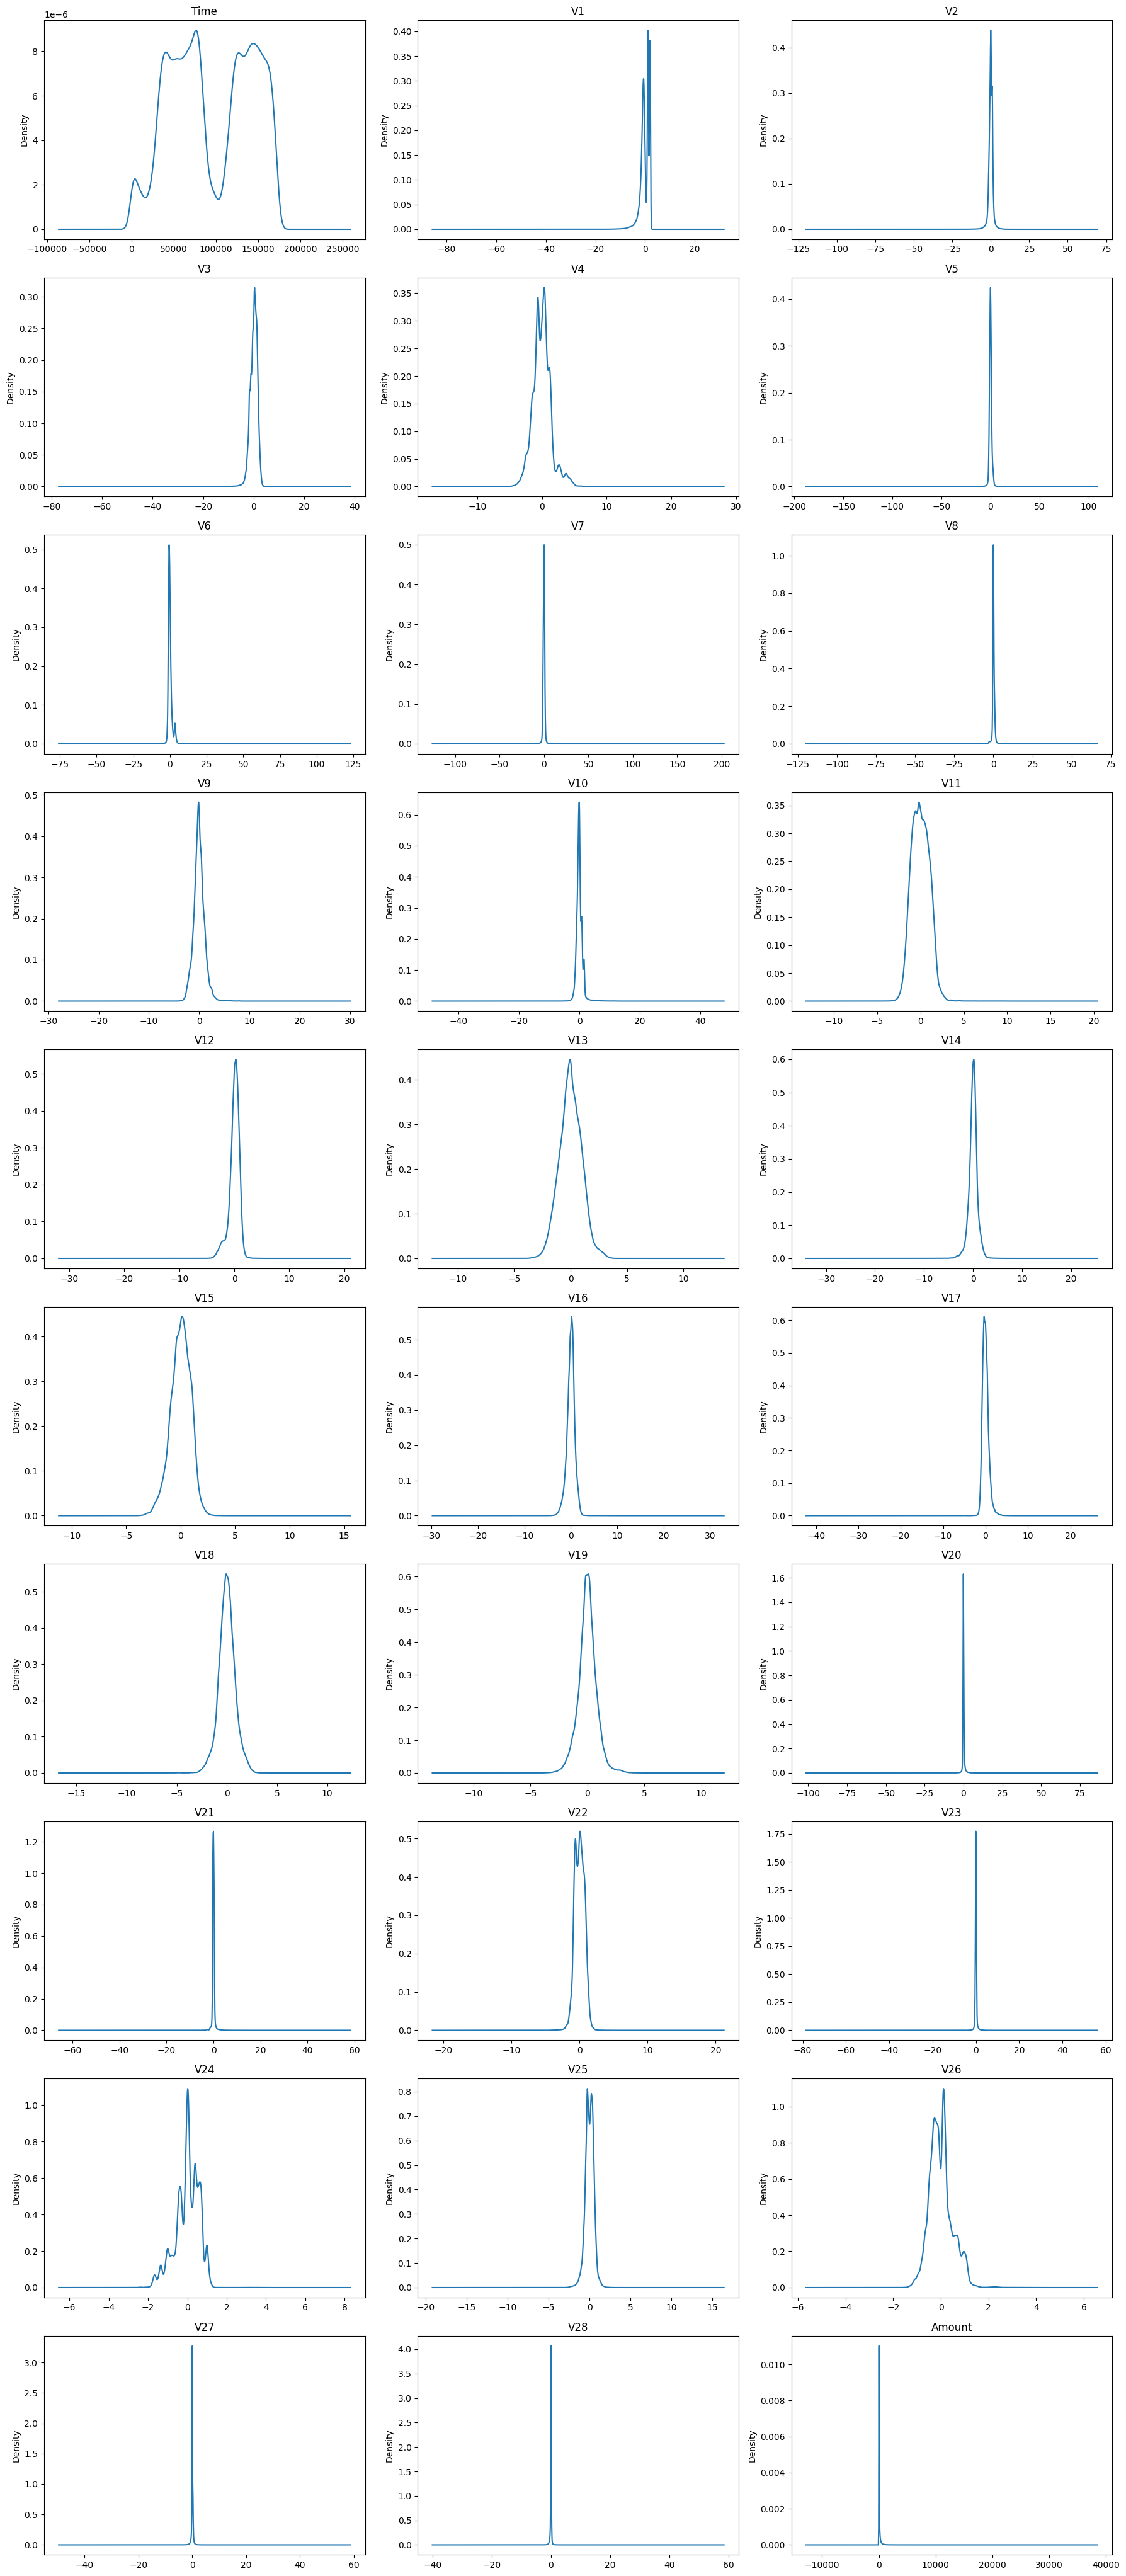

In [199]:
import math
fig, ax = plt.subplots(nrows=math.ceil(len(columns_dist)/3), ncols=3, figsize=(18,4*len(dataset.columns)//3))

for i, column in enumerate(columns_dist):
    dataset[column].plot(kind='kde', ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(column)
plt.tight_layout()
plt.show()

### Correlation matrix

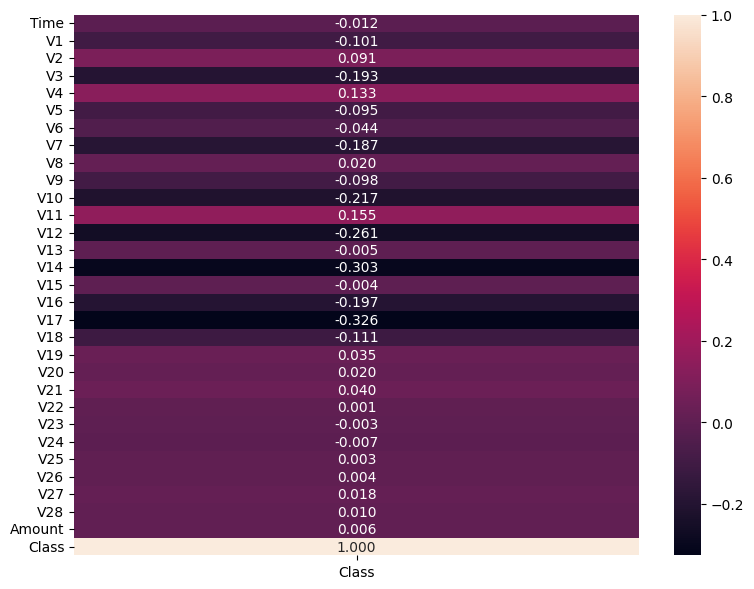

In [200]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(method="pearson")[["Class"]],annot=True,fmt=".3f")
plt.tight_layout()

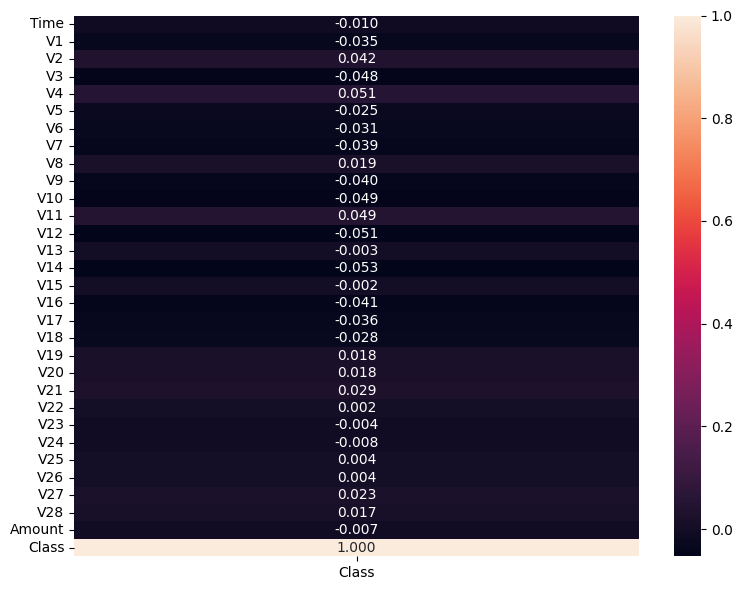

In [201]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(method="kendall")[["Class"]],annot=True,fmt=".3f")
plt.tight_layout()

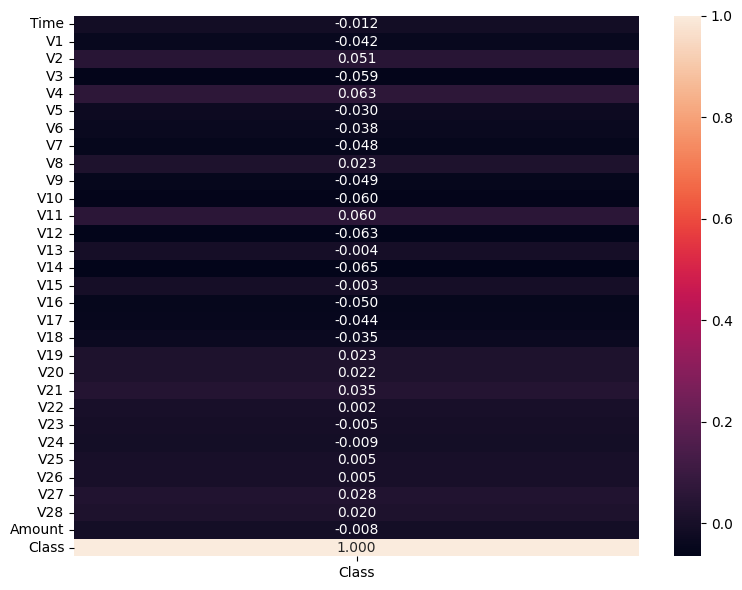

In [202]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(method="spearman")[["Class"]],annot=True,fmt=".3f")
plt.tight_layout()

### Correlation Method

pearson is suitable for normally distributed data

kendall is suitable for non-normally distributed data

spearman is suitable for non-normally distributed data

kendall is more suitable for data with outliers

spearman is more suitable for data without outliers

### Bar Plot of Class Distribution

In [203]:
# dataset['Class'].value_counts().reset_index(name="Count")

In [204]:
print(dataset["Class"].value_counts().index)
dataset["Class"].value_counts().values

Index([0, 1], dtype='int64', name='Class')


array([284315,    492], dtype=int64)

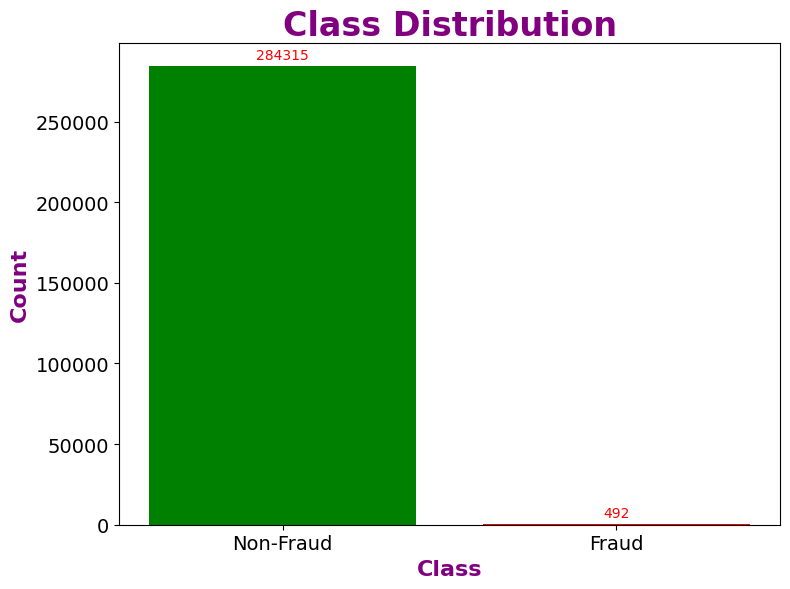

In [205]:
plt.figure(figsize=(8,6))
plt.bar(dataset["Class"].value_counts().index,dataset["Class"].value_counts().values)

plt.bar_label(container=plt.bar(dataset["Class"].value_counts().index,dataset["Class"].value_counts().values,color=["green","red"]),color="red",padding=3)
plt.xticks([0,1],["Non-Fraud","Fraud"],fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Class",fontsize=16,color="purple",fontweight="bold")
plt.ylabel("Count",fontsize=16,color="purple",fontweight="bold")
plt.title("Class Distribution",fontsize=24,color="purple",fontweight="bold")

# plt.legend()
plt.tight_layout()
plt.show()

### Analyzing before plotting graph of Variation of Amount per Class

In [206]:
fraud=dataset[dataset["Class"]==1]
nonfraud=dataset[dataset["Class"]==0]
fraud.shape,nonfraud.shape

((492, 31), (284315, 31))

In [207]:
print(f"Percentage of Fraud Transactions: {round(fraud.shape[0]/dataset.shape[0]*100,2)}%")

Percentage of Fraud Transactions: 0.17%


In [208]:
fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [209]:
nonfraud["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### Histogram of Variation Amount per Class

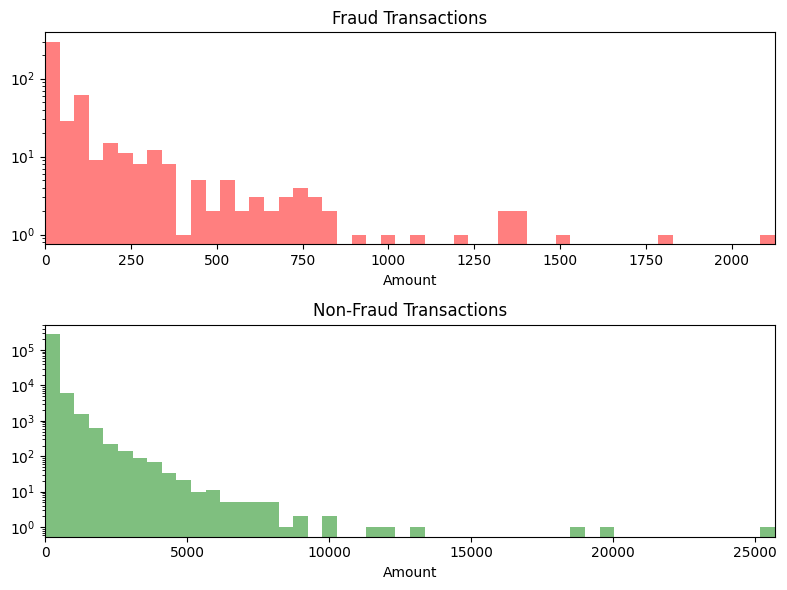

In [210]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(8,6))
ax1.hist(fraud["Amount"],bins=50,color="red",alpha=0.5,label="Fraud")
ax1.set_title("Fraud Transactions")
ax1.set_xlabel("Amount")
ax1.set_yscale("log")
ax1.set_xlim(0,fraud["Amount"].max())

ax2.hist(nonfraud["Amount"],bins=50,color="green",alpha=0.5,label="Non-Fraud")
ax2.set_title("Non-Fraud Transactions")
ax2.set_yscale("log")
ax2.set_xlabel("Amount")
ax2.set_xlim(0,nonfraud["Amount"].max())
plt.tight_layout()

## Data Preprocessing

### Removing Duplicate rows

In [211]:
dataset.shape

(284807, 31)

In [212]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(283726, 31)

### Droping Time Attribute
It is of no use to build the models and may not impact our target variable.

In [213]:
dataset.drop("Time",axis=1,inplace=True)

### Split into x and y

In [214]:
x=dataset.drop("Class",axis=1)
y=dataset["Class"]
x.shape,y.shape

((283726, 29), (283726,))

### Standardization Amount attribute values using StandardScaler

In [215]:
std=StandardScaler()
x["Amount"]=std.fit_transform(x["Amount"].values.reshape(-1,1))
x["Amount"]

0         0.244200
1        -0.342584
2         1.158900
3         0.139886
4        -0.073813
            ...   
284802   -0.350252
284803   -0.254325
284804   -0.082239
284805   -0.313391
284806    0.513290
Name: Amount, Length: 283726, dtype: float64

In [216]:
# Normalization Amount attribute values using MinMaxScaler
# x_mm=x.copy()
# x_mm
# minmax=MinMaxScaler()
# x_mm["Amount"]=minmax.fit_transform(x["Amount"].values.reshape(-1,1))
# x_mm["Amount"]

### Splitting Datasets_Before Resampling Method

In [217]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

x_train.shape,x_test.shape

((226980, 29), (56746, 29))

### Logistic Regression

In [218]:
LR=LogisticRegression()
print("Model fitting...")
LR.fit(x_train,y_train)
print("Model fitted!\n")

print("Training Dataset")
cr=classification_report(y_train,LR.predict(x_train),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_train,LR.predict(x_train))}\n")

# print("Validation Dataset")
# cr=classification_report(y_val,LR.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,LR.predict(x_val))}\n")

print("Testing Dataset")
cr=classification_report(y_test,LR.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,LR.predict(x_test))}\n")

# fig,ax=plt.subplots(3,1,figsize=(6,4*3))
# sns.heatmap(confusion_matrix(y_train,LR.predict(x_train)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Training Dataset",color="orange",fontsize=16)
# ax[0].set_xlabel("Predicted Label")
# ax[0].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_val,LR.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Validation Dataset",color="orange",fontsize=16)
# ax[1].set_xlabel("Predicted Label")
# ax[1].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_test,LR.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Testing Dataset",color="orange",fontsize=16)
# ax[2].set_xlabel("Predicted Label")
# ax[2].set_ylabel("Actual Label")

# plt.tight_layout()
# plt.show()

Model fitting...
Model fitted!

Training Dataset
Classification Report:
              precision    recall  f1-score   support

           0    0.99936   0.99984   0.99960    226597
           1    0.86909   0.62402   0.72644       383

    accuracy                        0.99921    226980
   macro avg    0.93423   0.81193   0.86302    226980
weighted avg    0.99914   0.99921   0.99914    226980

Accuracy Score: 0.9992069785884219

Testing Dataset
Classification Report:
              precision    recall  f1-score   support

           0    0.99928   0.99988   0.99958     56656
           1    0.87500   0.54444   0.67123        90

    accuracy                        0.99915     56746
   macro avg    0.93714   0.77216   0.83540     56746
weighted avg    0.99908   0.99915   0.99906     56746

Accuracy Score: 0.9991541254009093



### Decision Tree

In [219]:
DT=DecisionTreeClassifier()
print("Model fitting...")
DT.fit(x_train,y_train)
print("Model fitted!\n")

print("Training Dataset")
cr=classification_report(y_train,DT.predict(x_train),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_train,DT.predict(x_train))}\n")

# print("Validation Dataset")
# cr=classification_report(y_val,DT.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,DT.predict(x_val))}\n")

print("Testing Dataset")
cr=classification_report(y_test,DT.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,DT.predict(x_test))}\n")

# fig,ax=plt.subplots(3,1,figsize=(6,4*3))
# sns.heatmap(confusion_matrix(y_train,DT.predict(x_train)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Training Dataset",color="orange",fontsize=16)
# ax[0].set_xlabel("Predicted Label")
# ax[0].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_val,DT.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Validation Dataset",color="orange",fontsize=16)
# ax[1].set_xlabel("Predicted Label")
# ax[1].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_test,DT.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Testing Dataset",color="orange",fontsize=16)
# ax[2].set_xlabel("Predicted Label")
# ax[2].set_ylabel("Actual Label")

# plt.tight_layout()
# plt.show()

Model fitting...
Model fitted!

Training Dataset
Classification Report:
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000    226597
           1    1.00000   1.00000   1.00000       383

    accuracy                        1.00000    226980
   macro avg    1.00000   1.00000   1.00000    226980
weighted avg    1.00000   1.00000   1.00000    226980

Accuracy Score: 1.0

Testing Dataset
Classification Report:
              precision    recall  f1-score   support

           0    0.99958   0.99956   0.99957     56656
           1    0.72527   0.73333   0.72928        90

    accuracy                        0.99914     56746
   macro avg    0.86243   0.86645   0.86442     56746
weighted avg    0.99914   0.99914   0.99914     56746

Accuracy Score: 0.9991365030134283



### Random Forest

In [220]:
RF=RandomForestClassifier(random_state=42)
print("Model fitting...")
RF.fit(x_train,y_train)
print("Model fitted!\n")

print("Training Dataset")
cr=classification_report(y_train,RF.predict(x_train),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_train,RF.predict(x_train))}\n")

# print("Validation Dataset")
# cr=classification_report(y_val,RF.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,RF.predict(x_val))}\n")

print("Testing Dataset")
cr=classification_report(y_test,RF.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,RF.predict(x_test))}\n")

# fig,ax=plt.subplots(3,1,figsize=(6,4*3))
# sns.heatmap(confusion_matrix(y_train,RF.predict(x_train)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Training Dataset",color="orange",fontsize=16)
# ax[0].set_xlabel("Predicted Label")
# ax[0].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_val,RF.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Validation Dataset",color="orange",fontsize=16)
# ax[1].set_xlabel("Predicted Label")
# ax[1].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_test,RF.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Testing Dataset",color="orange",fontsize=16)
# ax[2].set_xlabel("Predicted Label")
# ax[2].set_ylabel("Actual Label")

# plt.tight_layout()
# plt.show()

Model fitting...
Model fitted!

Training Dataset
Classification Report:
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000    226597
           1    1.00000   1.00000   1.00000       383

    accuracy                        1.00000    226980
   macro avg    1.00000   1.00000   1.00000    226980
weighted avg    1.00000   1.00000   1.00000    226980

Accuracy Score: 1.0

Testing Dataset
Classification Report:
              precision    recall  f1-score   support

           0    0.99958   0.99996   0.99977     56656
           1    0.97059   0.73333   0.83544        90

    accuracy                        0.99954     56746
   macro avg    0.98508   0.86665   0.91761     56746
weighted avg    0.99953   0.99954   0.99951     56746

Accuracy Score: 0.9995418179254926



### Extreme Gradient Boosting

In [221]:
XGB=XGBClassifier()
print("Model fitting...")
XGB.fit(x_train,y_train)
print("Model fitted!\n")

print("Training Dataset")
cr=classification_report(y_train,XGB.predict(x_train),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_train,XGB.predict(x_train))}\n")

# print("Validation Dataset")
# cr=classification_report(y_val,XGB.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,XGB.predict(x_val))}\n")

print("Testing Dataset")
cr=classification_report(y_test,XGB.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,XGB.predict(x_test))}\n")

# fig,ax=plt.subplots(3,1,figsize=(6,4*3))
# sns.heatmap(confusion_matrix(y_train,XGB.predict(x_train)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Training Dataset",color="orange",fontsize=16)
# ax[0].set_xlabel("Predicted Label")
# ax[0].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_val,XGB.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Validation Dataset",color="orange",fontsize=16)
# ax[1].set_xlabel("Predicted Label")
# ax[1].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_test,XGB.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Testing Dataset",color="orange",fontsize=16)
# ax[2].set_xlabel("Predicted Label")
# ax[2].set_ylabel("Actual Label")

# plt.tight_layout()
# plt.show()

Model fitting...
Model fitted!

Training Dataset
Classification Report:
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000    226597
           1    1.00000   1.00000   1.00000       383

    accuracy                        1.00000    226980
   macro avg    1.00000   1.00000   1.00000    226980
weighted avg    1.00000   1.00000   1.00000    226980

Accuracy Score: 1.0

Testing Dataset
Classification Report:
              precision    recall  f1-score   support

           0    0.99956   0.99996   0.99976     56656
           1    0.97015   0.72222   0.82803        90

    accuracy                        0.99952     56746
   macro avg    0.98485   0.86109   0.91389     56746
weighted avg    0.99951   0.99952   0.99949     56746

Accuracy Score: 0.9995241955380115



### Classification Report LR vs DT vs RF vs XGB in Data Validation

In [222]:
# print("Validation Dataset\n")

# print("-- Logistic Regression --")
# cr=classification_report(y_val,LR.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,LR.predict(x_val))}\n")

# print("-- Decision Tree --")
# cr=classification_report(y_val,DT.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,DT.predict(x_val))}\n")

# print("-- Random Forest --")
# cr=classification_report(y_val,RF.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,RF.predict(x_val))}\n")

# print("-- Extreme Gradient Boosting --")
# cr=classification_report(y_val,XGB.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,XGB.predict(x_val))}\n")

### Classification Report LR vs DT vs RF vs XGB in Data Testing

In [223]:
print("Testing Dataset\n")

print("-- Logistic Regression --")
cr=classification_report(y_test,LR.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,LR.predict(x_test))}\n")

print("-- Decision Tree --")
cr=classification_report(y_test,DT.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,DT.predict(x_test))}\n")

print("-- Random Forest --")
cr=classification_report(y_test,RF.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,RF.predict(x_test))}\n")

print("-- Extreme Gradient Boosting --")
cr=classification_report(y_test,XGB.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,XGB.predict(x_test))}\n")

Testing Dataset

-- Logistic Regression --
Classification Report:
              precision    recall  f1-score   support

           0    0.99928   0.99988   0.99958     56656
           1    0.87500   0.54444   0.67123        90

    accuracy                        0.99915     56746
   macro avg    0.93714   0.77216   0.83540     56746
weighted avg    0.99908   0.99915   0.99906     56746

Accuracy Score: 0.9991541254009093

-- Decision Tree --
Classification Report:
              precision    recall  f1-score   support

           0    0.99958   0.99956   0.99957     56656
           1    0.72527   0.73333   0.72928        90

    accuracy                        0.99914     56746
   macro avg    0.86243   0.86645   0.86442     56746
weighted avg    0.99914   0.99914   0.99914     56746

Accuracy Score: 0.9991365030134283

-- Random Forest --
Classification Report:
              precision    recall  f1-score   support

           0    0.99958   0.99996   0.99977     56656
           1 

### Confusion Matrix LR vs DT vs RF vs XGB in Data Validation

In [224]:
# fig,ax=plt.subplots(4,1,figsize=(6,4*4))
# sns.heatmap(confusion_matrix(y_val,LR.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Logistic Regression (Validation)",color="darkorange",fontsize=16)
# ax[0].set_xlabel("Predicted Label",fontsize=14)
# ax[0].set_ylabel("Actual Label",fontsize=14)

# sns.heatmap(confusion_matrix(y_val,DT.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Decision Tree (Validation)",color="darkorange",fontsize=16)
# ax[1].set_xlabel("Predicted Label",fontsize=14)
# ax[1].set_ylabel("Actual Label",fontsize=14)

# sns.heatmap(confusion_matrix(y_val,RF.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Random Forest (Validation)",color="darkorange",fontsize=16)
# ax[2].set_xlabel("Predicted Label",fontsize=14)
# ax[2].set_ylabel("Actual Label",fontsize=14)

# sns.heatmap(confusion_matrix(y_val,XGB.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[3])
# ax[3].set_title("Confusion Matrix Extreme Gradient Boosting (Validation)",color="darkorange",fontsize=16)
# ax[3].set_xlabel("Predicted Label",fontsize=14)
# ax[3].set_ylabel("Actual Label",fontsize=14)

# plt.tight_layout()
# plt.show()

### Confusion Matrix LR vs DT vs RF vs XGB in Data Testing

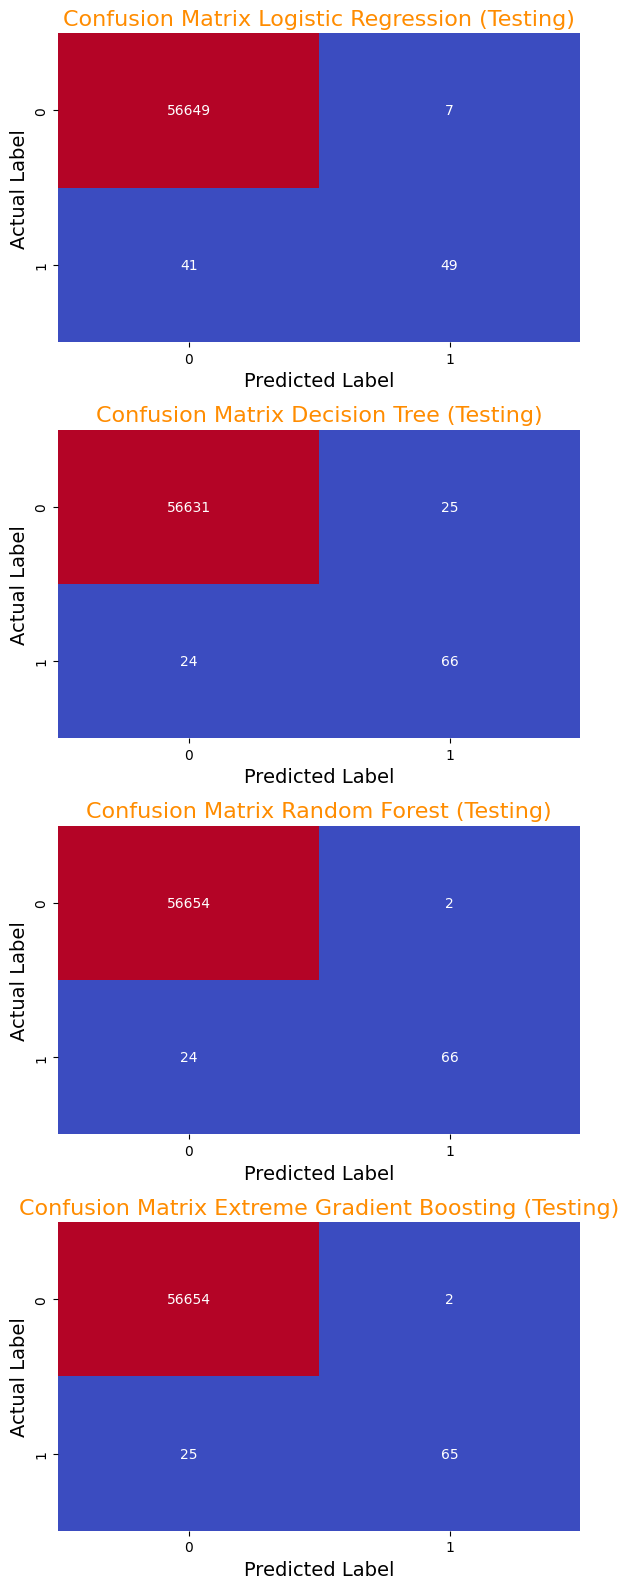

In [225]:
fig,ax=plt.subplots(4,1,figsize=(6,4*4))
sns.heatmap(confusion_matrix(y_test,LR.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0],cbar=False)
ax[0].set_title("Confusion Matrix Logistic Regression (Testing)",color="darkorange",fontsize=16)
ax[0].set_xlabel("Predicted Label",fontsize=14)
ax[0].set_ylabel("Actual Label",fontsize=14)

sns.heatmap(confusion_matrix(y_test,DT.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1],cbar=False)
ax[1].set_title("Confusion Matrix Decision Tree (Testing)",color="darkorange",fontsize=16)
ax[1].set_xlabel("Predicted Label",fontsize=14)
ax[1].set_ylabel("Actual Label",fontsize=14)

sns.heatmap(confusion_matrix(y_test,RF.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2],cbar=False)
ax[2].set_title("Confusion Matrix Random Forest (Testing)",color="darkorange",fontsize=16)
ax[2].set_xlabel("Predicted Label",fontsize=14)
ax[2].set_ylabel("Actual Label",fontsize=14)

sns.heatmap(confusion_matrix(y_test,XGB.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[3],cbar=False)
ax[3].set_title("Confusion Matrix Extreme Gradient Boosting (Testing)",color="darkorange",fontsize=16)
ax[3].set_xlabel("Predicted Label",fontsize=14)
ax[3].set_ylabel("Actual Label",fontsize=14)

plt.tight_layout()
plt.show()

Based on the results in the testing data, it can be determined that the XGBoost classification algorithm has the best results based on various performance measures, such as Precision, Recall, F1-Score, Accuracy scores of 98%, 91%, 95%, 99.96% respectively which concludes the biased nature of the algorithm when performing validation, which indicates the unbalanced nature of the data. Thus, the data balancing technique was chosen to be applied to the algorithm that produced the best results, no matter the bias, i.e. XGBoost Classification algorithm.

### AUPRC Evaluation Metric

Average Precision Score (Logistic Regression): 0.70642
Average Precision Score (Decision Tree): 0.53229
Average Precision Score (Random Forest): 0.81263
Average Precision Score (XGBoost): 0.82587


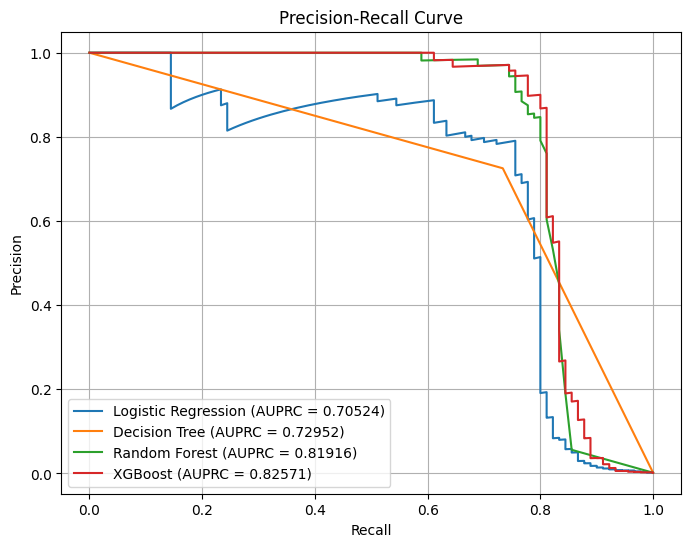

In [226]:
def plot_pr_curve(model, x_test, y_test, model_name):
    probs = model.predict_proba(x_test)[:, 1]
    
    ap=average_precision_score(y_test, probs)
    print(f"Average Precision Score ({model_name}): {ap:.5f}")
    
    precision, recall, _ = precision_recall_curve(y_test, probs)

    auprc = auc(recall, precision)

    plt.plot(recall, precision, label=f'{model_name} (AUPRC = {auprc:.5f})')


plt.figure(figsize=(8, 6))
plot_pr_curve(LR, x_test, y_test, 'Logistic Regression')
plot_pr_curve(DT, x_test, y_test, 'Decision Tree')
plot_pr_curve(RF, x_test, y_test, 'Random Forest')
plot_pr_curve(XGB, x_test, y_test, 'XGBoost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

## Undersampling Methods for Imbalanced Data

In [227]:
List_x_y=[]

In [228]:
x.shape,y.shape

((283726, 29), (283726,))

In [229]:
y.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [230]:
x_train.shape,y_train.shape

((226980, 29), (226980,))

In [231]:
y_train.value_counts()

Class
0    226597
1       383
Name: count, dtype: int64

### Condensed Nearest Neighbour (CNN)

In [232]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(sampling_strategy="auto", random_state = 42, n_neighbors=1, n_jobs = -1)
x_cnn,y_cnn = cnn.fit_resample(x,y)
x_train_cnn,x_test_cnn,y_train_cnn,y_test_cnn=train_test_split(x_cnn,y_cnn,test_size=0.2,random_state=42)

List_x_y.append(("CNN",x_train_cnn,y_train_cnn,x_test_cnn,y_test_cnn))
x_train_cnn.shape,y_train_cnn.shape

((1287, 29), (1287,))

In [233]:
y_cnn.value_counts()

Class
0    1136
1     473
Name: count, dtype: int64

In [234]:
y_train_cnn.value_counts()

Class
0    905
1    382
Name: count, dtype: int64

### Neighbourhood Cleaning Rule (NCR)

In [235]:
from imblearn.under_sampling import NeighbourhoodCleaningRule,EditedNearestNeighbours

ncr = NeighbourhoodCleaningRule(sampling_strategy="auto",n_neighbors=3,threshold_cleaning=0.5,n_jobs=-1)
x_ncr,y_ncr = ncr.fit_resample(x,y)
x_train_ncr,x_test_ncr,y_train_ncr,y_test_ncr=train_test_split(x_ncr,y_ncr,test_size=0.2,random_state=42)

List_x_y.append(("NCR",x_train_ncr,y_train_ncr,x_test_ncr,y_test_ncr))
x_train_ncr.shape,y_train_ncr.shape

((226766, 29), (226766,))

In [236]:
y_ncr.value_counts()

Class
0    282985
1       473
Name: count, dtype: int64

In [237]:
y_train_ncr.value_counts()

Class
0    226389
1       377
Name: count, dtype: int64

### Random Undersampling

In [238]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(sampling_strategy="auto",random_state=42)
x_rus,y_rus=rus.fit_resample(x,y)
x_train_rus,x_test_rus,y_train_rus,y_test_rus=train_test_split(x_rus,y_rus,test_size=0.2,random_state=42)
List_x_y.append(("RUS",x_train_rus,y_train_rus,x_test_rus,y_test_rus))
x_train_rus.shape,y_train_rus.shape

((756, 29), (756,))

In [239]:
y_rus.value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [240]:
y_train_rus.value_counts()

Class
0    385
1    371
Name: count, dtype: int64

## Oversampling Methods for Imbalanced Data

### Synthetic Minority Oversampling Technique (SMOTE)

In [241]:
from imblearn.over_sampling import SMOTE
# from collections import Counter

smote=SMOTE(sampling_strategy="auto",random_state=42)
x_smote,y_smote=smote.fit_resample(x,y)
x_train_smote,x_test_smote,y_train_smote,y_test_smote=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

List_x_y.append(("SMOTE",x_train_smote,y_train_smote,x_test_smote,y_test_smote))
x_train_smote.shape,y_train_smote.shape

((453204, 29), (453204,))

In [242]:
y_smote.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [243]:
y_train_smote.value_counts()

Class
0    226790
1    226414
Name: count, dtype: int64

### Adaptive Synthetic Sampling (ADASYN)

In [244]:
from imblearn.over_sampling import ADASYN

adasyn=ADASYN(sampling_strategy="auto",random_state=42)
x_adasyn,y_adasyn=adasyn.fit_resample(x,y)

x_train_adasyn,x_test_adasyn,y_train_adasyn,y_test_adasyn=train_test_split(x_adasyn,y_adasyn,test_size=0.2,random_state=42)

List_x_y.append(("ADASYN",x_train_adasyn,y_train_adasyn,x_test_adasyn,y_test_adasyn))
x_train_adasyn.shape,y_train_adasyn.shape

((453243, 29), (453243,))

In [245]:
y_adasyn.value_counts()

Class
1    283301
0    283253
Name: count, dtype: int64

In [246]:
y_train_adasyn.value_counts()

Class
1    226625
0    226618
Name: count, dtype: int64

### Random Oversampling

In [247]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(sampling_strategy="auto",random_state=42)
x_ros,y_ros=ros.fit_resample(x,y)
x_train_ros,x_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,test_size=0.2,random_state=42)

List_x_y.append(("ROS",x_train_ros,y_train_ros,x_test_ros,y_test_ros))
x_train_ros.shape,y_train_ros.shape

((453204, 29), (453204,))

In [248]:
y_ros.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [249]:
y_train_ros.value_counts()

Class
0    226790
1    226414
Name: count, dtype: int64

## Oversampling + Undersampling Methods for Imbalanced Data

### SMOTE + NCR

In [250]:
smote=SMOTE(sampling_strategy="auto",random_state=42)
ncr=NeighbourhoodCleaningRule(sampling_strategy="all",n_neighbors=3,threshold_cleaning=0.5,n_jobs=-1)

x_sm,y_sm=smote.fit_resample(x,y)

print(x_sm.shape,y_sm.shape)
print(x_sm.head())
print(y_sm.head())
print(y_sm.value_counts())

x_smote_ncr,y_smote_ncr=ncr.fit_resample(x_sm,y_sm)
x_train_smote_ncr,x_test_smote_ncr,y_train_smote_ncr,y_test_smote_ncr=train_test_split(x_smote_ncr,y_smote_ncr,test_size=0.2,random_state=42)

List_x_y.append(("SMOTE+NCR",x_train_smote_ncr,y_train_smote_ncr,x_test_smote_ncr,y_test_smote_ncr))

(566506, 29) (566506,)
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27    

In [251]:
print(x_smote_ncr.head())
print(y_smote_ncr.head())
print(x_smote_ncr.shape,y_smote_ncr.shape)
print(y_smote_ncr.value_counts())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  
0  0

In [252]:
print(x_train_smote_ncr.head())
print(y_train_smote_ncr.head())
print(x_train_smote_ncr.shape,y_train_smote_ncr.shape)
print(y_train_smote_ncr.value_counts())

               V1        V2         V3        V4         V5        V6  \
531451  -1.910464  1.933394  -2.042713  1.917854  -0.337651 -1.569065   
165679   0.336464  0.684625  -0.184829  1.276535   0.750218 -0.044409   
363293 -12.934256  6.673593 -13.241091  8.726795 -11.236304 -2.723972   
134242   1.262804  0.704388  -0.498916  1.268541   0.245528 -1.042334   
127065   1.198164  0.115922   0.328186  0.671532  -0.463145 -0.995986   

               V7        V8        V9        V10  ...       V20       V21  \
531451  -1.412738 -0.403744 -0.872853  -2.245171  ...  0.048504  0.649759   
165679   0.854124 -0.568756  0.212494   0.501155  ...  0.501497  0.279690   
363293 -14.093110  8.135331 -7.862679 -12.817541  ... -0.770625  2.591388   
134242   0.293640 -0.213433 -0.042199  -0.676370  ... -0.096576 -0.093194   
127065   0.137811 -0.255910  0.027180  -0.056529  ... -0.010290  0.067928   

             V22       V23       V24       V25       V26       V27       V28  \
531451 -0.226140  

### ADASYN + NCR

In [253]:
adasyn=ADASYN(sampling_strategy="auto",random_state=42)
ncr = NeighbourhoodCleaningRule(sampling_strategy="all",n_neighbors=3,threshold_cleaning=0.5,n_jobs=-1)

x_ad,y_ad=adasyn.fit_resample(x,y)

print(x_ad.shape,y_ad.shape)
print(x_ad.head())
print(y_ad.head())
print(y_ad.value_counts())

x_adasyn_ncr,y_adasyn_ncr=ncr.fit_resample(x_ad,y_ad)
x_train_adasyn_ncr,x_test_adasyn_ncr,y_train_adasyn_ncr,y_test_adasyn_ncr=train_test_split(x_adasyn_ncr,y_adasyn_ncr,test_size=0.2,random_state=42)

List_x_y.append(("ADASYN+NCR",x_train_adasyn_ncr,y_train_adasyn_ncr,x_test_adasyn_ncr,y_test_adasyn_ncr))

(566554, 29) (566554,)
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27    

In [254]:
print(x_adasyn_ncr.head())
print(y_adasyn_ncr.head())
print(x_adasyn_ncr.shape,y_adasyn_ncr.shape)
print(y_adasyn_ncr.value_counts())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  
0  0

In [255]:
print(x_train_adasyn_ncr.head())
print(y_train_adasyn_ncr.head())
print(x_train_adasyn_ncr.shape,y_train_adasyn_ncr.shape)
print(y_train_adasyn_ncr.value_counts())

              V1        V2        V3        V4        V5        V6        V7  \
206141  1.740800 -0.574387 -3.392054 -0.468740  2.560745  3.047717 -0.168809   
154833 -0.562084  0.763291  2.448809 -0.208990  0.150897  0.021178  0.457502   
495595  2.127825  0.691607 -3.504753  0.512549  1.509386 -1.698688  1.118714   
546896  0.160819  1.213135  0.452681  2.810182  1.405821 -0.220536  1.341667   
471003 -1.766752  1.179758 -2.527521  1.005863 -1.144398 -1.128333 -2.677104   

              V8        V9       V10  ...       V20       V21       V22  \
206141  0.683853  0.417487 -0.569840  ...  0.192038  0.282200  0.514264   
154833 -0.118549  1.225732 -0.987785  ...  0.090430 -0.239676 -0.272613   
495595 -0.569290  0.140264 -1.000613  ... -0.205060  0.157531  0.683401   
546896 -0.327130 -1.601634  1.136102  ... -0.184156  0.239091  0.820812   
471003  0.224448 -1.070340 -3.558132  ...  0.280381  0.845137  1.113536   

             V23       V24       V25       V26       V27       V28  

## Classification Report XGBoost in Data Validation with Resampling Method

In [256]:
# XGB=XGBClassifier()
# print("--- Validation Dataset ---")
# print("-- Extreme Gradient Boosting --\n")
# for name,x,y in List_x_y:
#     print("Model fitting...")
#     XGB.fit(x,y)
#     print(f"Model fitted - {name}!\n")

#     cr=classification_report(y_val,XGB.predict(x_val))
#     print(f"Classification Report:\n{cr}")
#     print(f"Accuracy Score: {accuracy_score(y_val,XGB.predict(x_val))}\n\n\n")

## Classification Report & Confusion Matrix XGBoost in Data Testing with Resampling Method

--- Testing Dataset ---
-- Extreme Gradient Boosting --

Model fitting...
Model fitted - CNN!

Classification Report:
              precision    recall  f1-score   support

           0    0.92050   0.95238   0.93617       231
           1    0.86747   0.79121   0.82759        91

    accuracy                        0.90683       322
   macro avg    0.89399   0.87179   0.88188       322
weighted avg    0.90551   0.90683   0.90548       322

Accuracy Score: 0.906832298136646


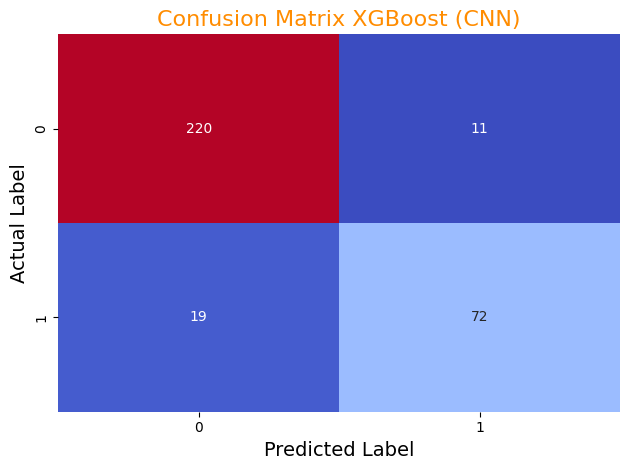

Model fitting...
Model fitted - NCR!

Classification Report:
              precision    recall  f1-score   support

           0    0.99965   1.00000   0.99982     56596
           1    1.00000   0.79167   0.88372        96

    accuracy                        0.99965     56692
   macro avg    0.99982   0.89583   0.94177     56692
weighted avg    0.99965   0.99965   0.99963     56692

Accuracy Score: 0.9996472165384886


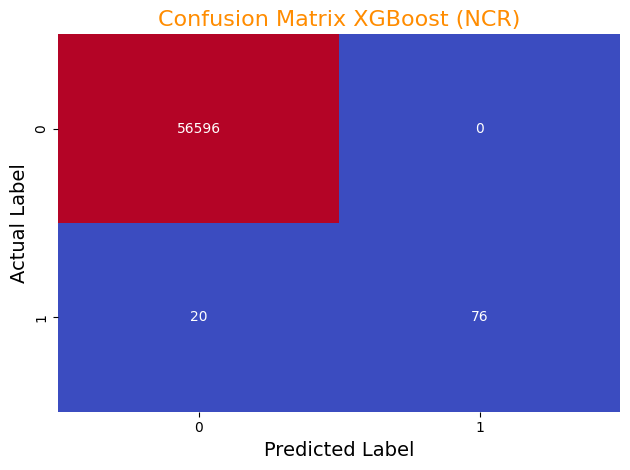

Model fitting...
Model fitted - RUS!

Classification Report:
              precision    recall  f1-score   support

           0    0.90625   0.98864   0.94565        88
           1    0.98936   0.91176   0.94898       102

    accuracy                        0.94737       190
   macro avg    0.94781   0.95020   0.94732       190
weighted avg    0.95087   0.94737   0.94744       190

Accuracy Score: 0.9473684210526315


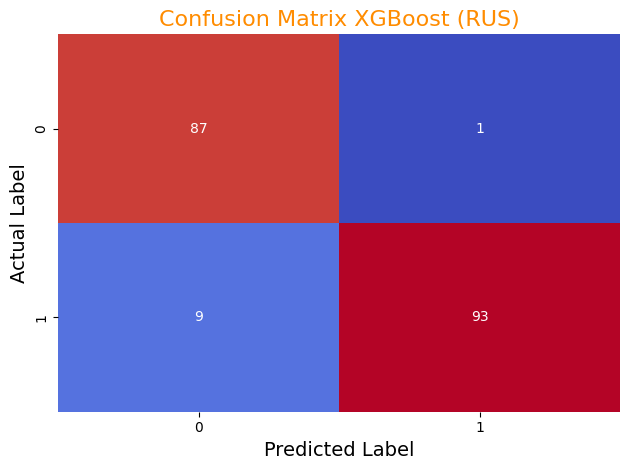

Model fitting...
Model fitted - SMOTE!

Classification Report:
              precision    recall  f1-score   support

           0    1.00000   0.99938   0.99969     56463
           1    0.99938   1.00000   0.99969     56839

    accuracy                        0.99969    113302
   macro avg    0.99969   0.99969   0.99969    113302
weighted avg    0.99969   0.99969   0.99969    113302

Accuracy Score: 0.9996910910663537


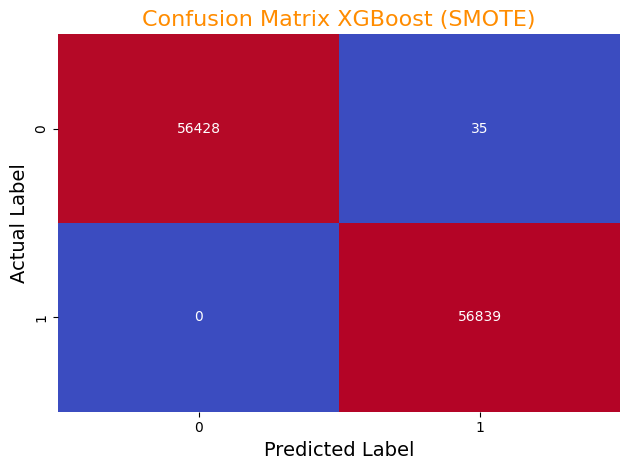

Model fitting...
Model fitted - ADASYN!

Classification Report:
              precision    recall  f1-score   support

           0    1.00000   0.99899   0.99950     56635
           1    0.99900   1.00000   0.99950     56676

    accuracy                        0.99950    113311
   macro avg    0.99950   0.99950   0.99950    113311
weighted avg    0.99950   0.99950   0.99950    113311

Accuracy Score: 0.9994969596949987


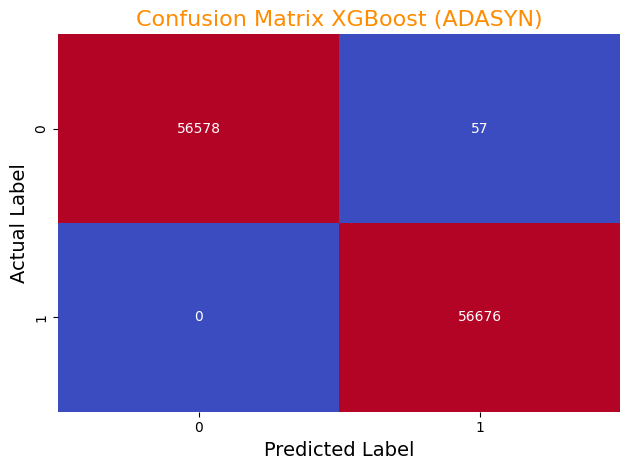

Model fitting...
Model fitted - ROS!

Classification Report:
              precision    recall  f1-score   support

           0    1.00000   0.99991   0.99996     56463
           1    0.99991   1.00000   0.99996     56839

    accuracy                        0.99996    113302
   macro avg    0.99996   0.99996   0.99996    113302
weighted avg    0.99996   0.99996   0.99996    113302

Accuracy Score: 0.9999558701523362


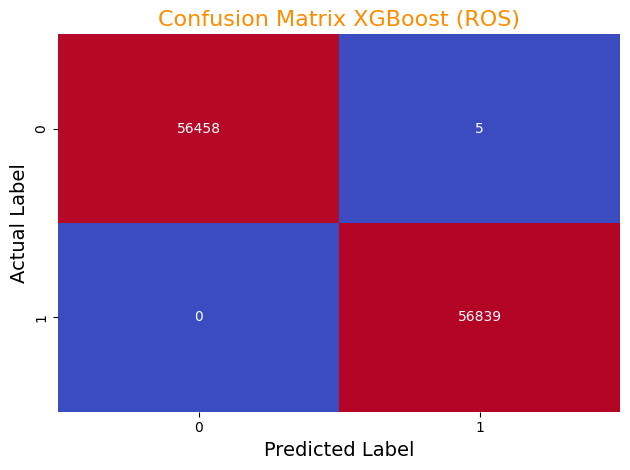

Model fitting...
Model fitted - SMOTE+NCR!

Classification Report:
              precision    recall  f1-score   support

           0    1.00000   0.99968   0.99984     56562
           1    0.99968   1.00000   0.99984     56596

    accuracy                        0.99984    113158
   macro avg    0.99984   0.99984   0.99984    113158
weighted avg    0.99984   0.99984   0.99984    113158

Accuracy Score: 0.9998409303805299


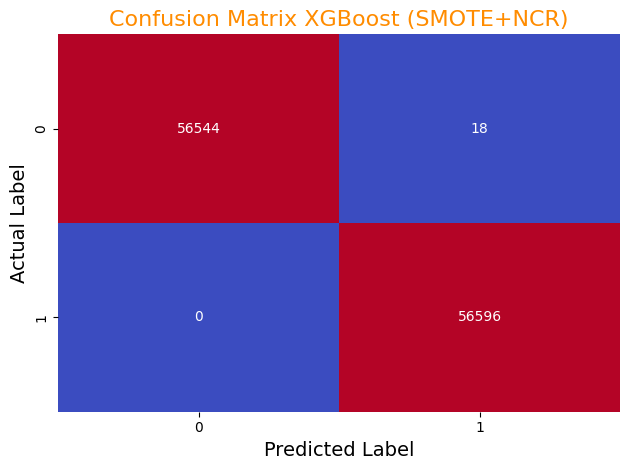

Model fitting...
Model fitted - ADASYN+NCR!

Classification Report:
              precision    recall  f1-score   support

           0    1.00000   0.99952   0.99976     56528
           1    0.99952   1.00000   0.99976     56639

    accuracy                        0.99976    113167
   macro avg    0.99976   0.99976   0.99976    113167
weighted avg    0.99976   0.99976   0.99976    113167

Accuracy Score: 0.9997614145466435


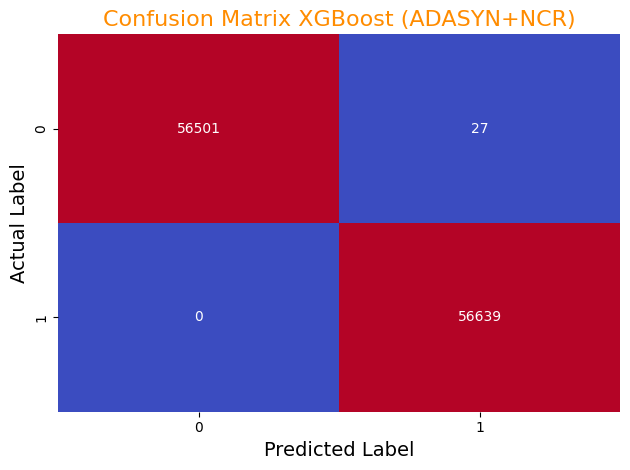

In [257]:
print("--- Testing Dataset ---")
print("-- Extreme Gradient Boosting --\n")
for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
    print("Model fitting...")
    XGB.fit(x_tr,y_tr)
    print(f"Model fitted - {name}!\n")
    
    y_preds=XGB.predict(x_ts)
    
    cr=classification_report(y_ts,y_preds,digits=5)
    
    print(f"Classification Report:\n{cr}")
    print(f"Accuracy Score: {accuracy_score(y_ts,y_preds)}")
    
    cm=confusion_matrix(y_ts,y_preds)
    
    sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
    plt.title(f"Confusion Matrix XGBoost ({name})",color="darkorange",fontsize=16)
    plt.xlabel("Predicted Label",fontsize=14)
    plt.ylabel("Actual Label",fontsize=14)
    plt.tight_layout()
    plt.show()

## Classification Report & Confusion Matrix Random Forest in Data Testing with Resampling Method

--- Testing Dataset ---
-- Random Forest --

Model fitting...
Model fitted - CNN!

Classification Report:
              precision    recall  f1-score   support

           0    0.91803   0.96970   0.94316       231
           1    0.91026   0.78022   0.84024        91

    accuracy                        0.91615       322
   macro avg    0.91414   0.87496   0.89170       322
weighted avg    0.91584   0.91615   0.91407       322

Accuracy Score: 0.9161490683229814


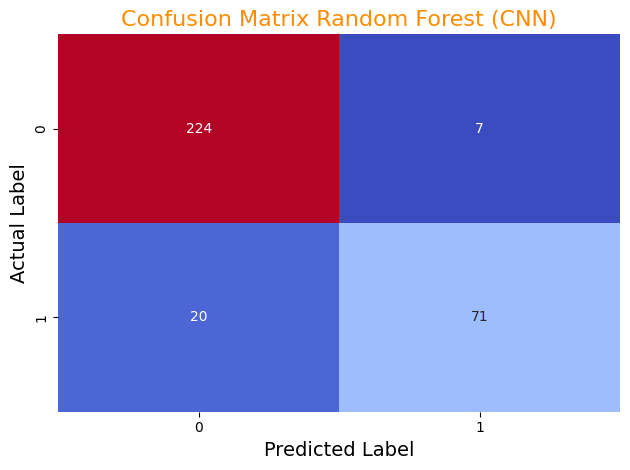

Model fitting...
Model fitted - NCR!

Classification Report:
              precision    recall  f1-score   support

           0    0.99958   0.99998   0.99978     56596
           1    0.98630   0.75000   0.85207        96

    accuracy                        0.99956     56692
   macro avg    0.99294   0.87499   0.92593     56692
weighted avg    0.99955   0.99956   0.99953     56692

Accuracy Score: 0.9995590206731109


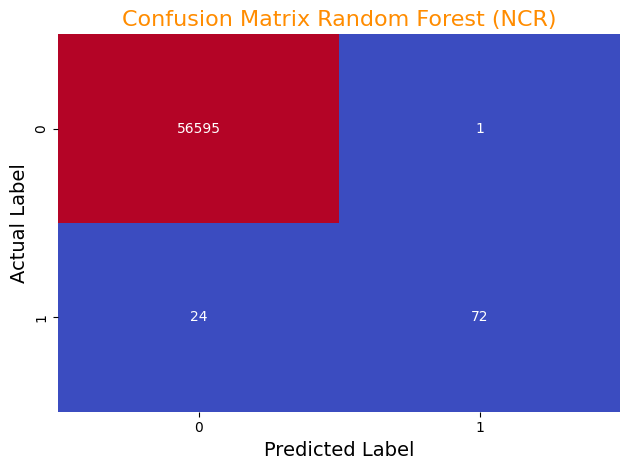

Model fitting...
Model fitted - RUS!

Classification Report:
              precision    recall  f1-score   support

           0    0.89691   0.98864   0.94054        88
           1    0.98925   0.90196   0.94359       102

    accuracy                        0.94211       190
   macro avg    0.94308   0.94530   0.94207       190
weighted avg    0.94648   0.94211   0.94218       190

Accuracy Score: 0.9421052631578948


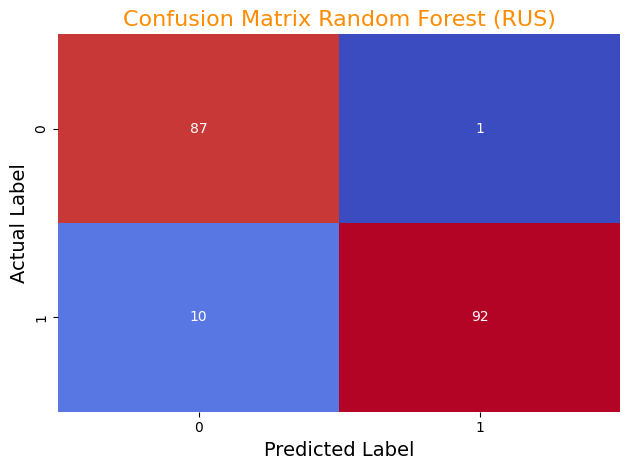

Model fitting...
Model fitted - SMOTE!

Classification Report:
              precision    recall  f1-score   support

           0    1.00000   0.99979   0.99989     56463
           1    0.99979   1.00000   0.99989     56839

    accuracy                        0.99989    113302
   macro avg    0.99989   0.99989   0.99989    113302
weighted avg    0.99989   0.99989   0.99989    113302

Accuracy Score: 0.999894088365607


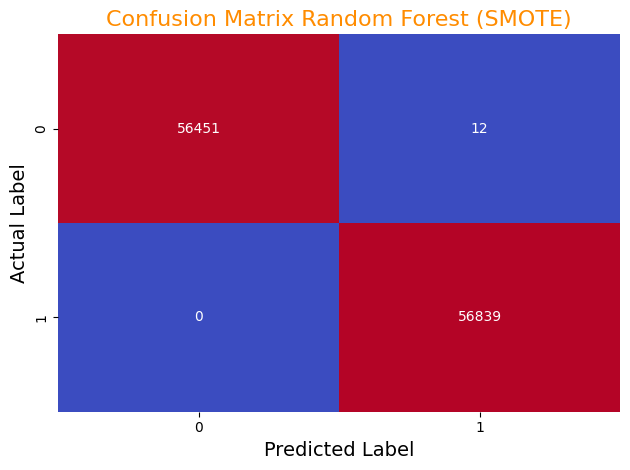

Model fitting...
Model fitted - ADASYN!

Classification Report:
              precision    recall  f1-score   support

           0    0.99998   0.99974   0.99986     56635
           1    0.99974   0.99998   0.99986     56676

    accuracy                        0.99986    113311
   macro avg    0.99986   0.99986   0.99986    113311
weighted avg    0.99986   0.99986   0.99986    113311

Accuracy Score: 0.9998587957038593


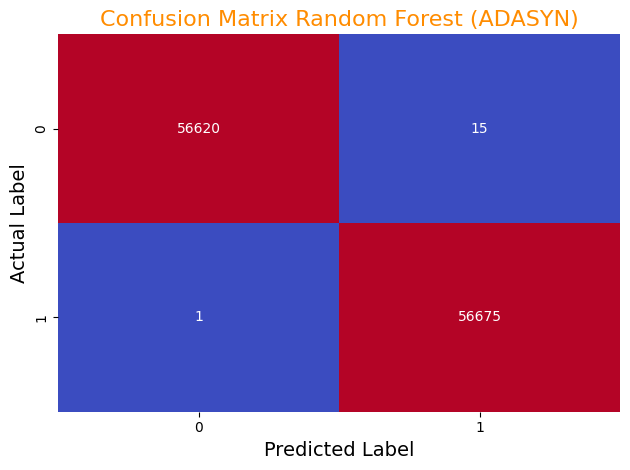

Model fitting...
Model fitted - ROS!

Classification Report:
              precision    recall  f1-score   support

           0    1.00000   0.99995   0.99997     56463
           1    0.99995   1.00000   0.99997     56839

    accuracy                        0.99997    113302
   macro avg    0.99997   0.99997   0.99997    113302
weighted avg    0.99997   0.99997   0.99997    113302

Accuracy Score: 0.9999735220914018


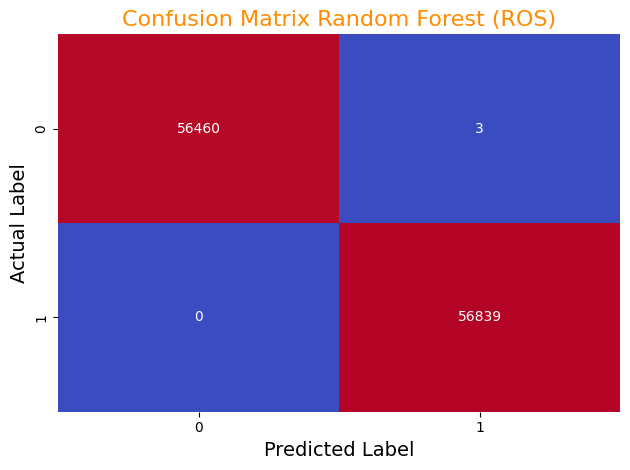

Model fitting...
Model fitted - SMOTE+NCR!

Classification Report:
              precision    recall  f1-score   support

           0    1.00000   0.99988   0.99994     56562
           1    0.99988   1.00000   0.99994     56596

    accuracy                        0.99994    113158
   macro avg    0.99994   0.99994   0.99994    113158
weighted avg    0.99994   0.99994   0.99994    113158

Accuracy Score: 0.9999381395924283


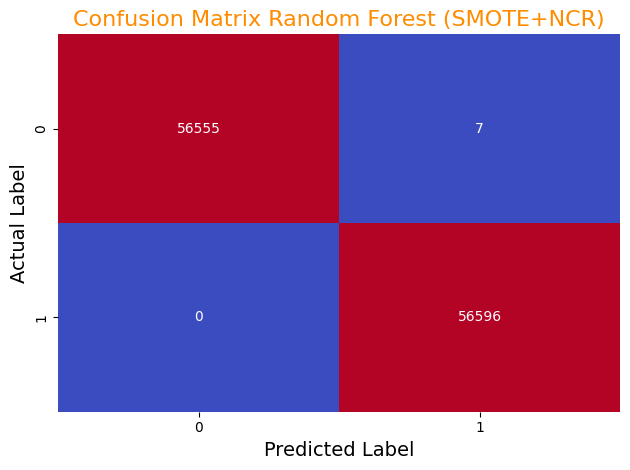

Model fitting...
Model fitted - ADASYN+NCR!

Classification Report:
              precision    recall  f1-score   support

           0    1.00000   0.99993   0.99996     56528
           1    0.99993   1.00000   0.99996     56639

    accuracy                        0.99996    113167
   macro avg    0.99996   0.99996   0.99996    113167
weighted avg    0.99996   0.99996   0.99996    113167

Accuracy Score: 0.9999646540069101


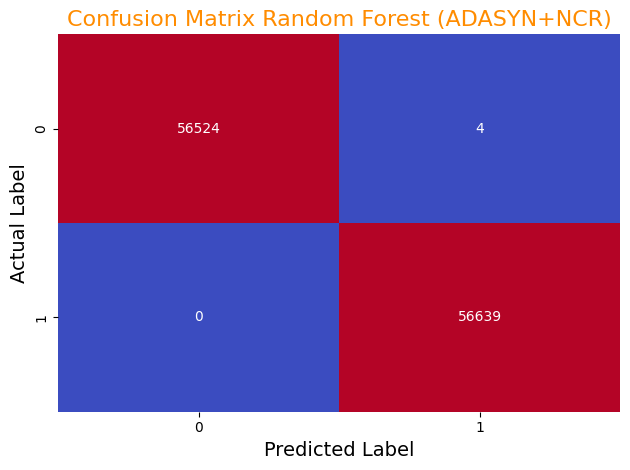

In [258]:
print("--- Testing Dataset ---")
print("-- Random Forest --\n")
for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
    print("Model fitting...")
    RF.fit(x_tr,y_tr)
    print(f"Model fitted - {name}!\n")
    
    y_preds=RF.predict(x_ts)
    
    cr=classification_report(y_ts,y_preds,digits=5)
    
    print(f"Classification Report:\n{cr}")
    print(f"Accuracy Score: {accuracy_score(y_ts,y_preds)}")
    
    cm=confusion_matrix(y_ts,y_preds)
    
    sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
    plt.title(f"Confusion Matrix Random Forest ({name})",color="darkorange",fontsize=16)
    plt.xlabel("Predicted Label",fontsize=14)
    plt.ylabel("Actual Label",fontsize=14)
    plt.tight_layout()
    plt.show()

## Confusion Matrix XGBoost in Data Validation with Resampling Method

In [259]:
# print(f"--- Validation Dataset ---")
# print("-- Extreme Gradient Boosting --\n")
# for name,x,y in List_x_y:
#     XGB.fit(x,y)
#     cm=confusion_matrix(y_val,XGB.predict(x_val))
#     sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g")
#     plt.title(f"Confusion Matrix ({name})",color="darkorange",fontsize=16)
#     plt.xlabel("Predicted Label",fontsize=14)
#     plt.ylabel("Actual Label",fontsize=14)
#     plt.tight_layout()
#     plt.show()

## Confusion Matrix XGBoost in Data Testing with Resampling Method

In [260]:
# print(f"--- Testing Dataset ---")
# print("-- Extreme Gradient Boosting --\n")
# for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
#     XGB.fit(x_tr,y_tr)
    
#     y_preds=XGB.predict(x_ts)
    
#     cm=confusion_matrix(y_ts,y_preds)
    
#     sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
#     plt.title(f"Confusion Matrix XGBoost ({name})",color="darkorange",fontsize=16)
#     plt.xlabel("Predicted Label",fontsize=14)
#     plt.ylabel("Actual Label",fontsize=14)
#     plt.tight_layout()
#     plt.show()

## Confusion Matrix Random Forest in Data Testing with Resampling Method

In [261]:
# print(f"--- Testing Dataset ---")
# print("-- Random Forest --\n")
# for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
#     RF.fit(x_tr,y_tr)
    
#     y_preds=RF.predict(x_ts)
    
#     cm=confusion_matrix(y_ts,y_preds)
    
#     sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
#     plt.title(f"Confusion Matrix Random Forest ({name})",color="darkorange",fontsize=16)
#     plt.xlabel("Predicted Label",fontsize=14)
#     plt.ylabel("Actual Label",fontsize=14)
#     plt.tight_layout()
#     plt.show()

## AUPRC with Resampling Method

Average Precision Score (CNN): 0.74536
Average Precision Score (NCR): 0.79202
Average Precision Score (RUS): 0.94943
Average Precision Score (SMOTE): 0.99938
Average Precision Score (ADASYN): 0.99900
Average Precision Score (ROS): 0.99991
Average Precision Score (SMOTE+NCR): 0.99968
Average Precision Score (ADASYN+NCR): 0.99952


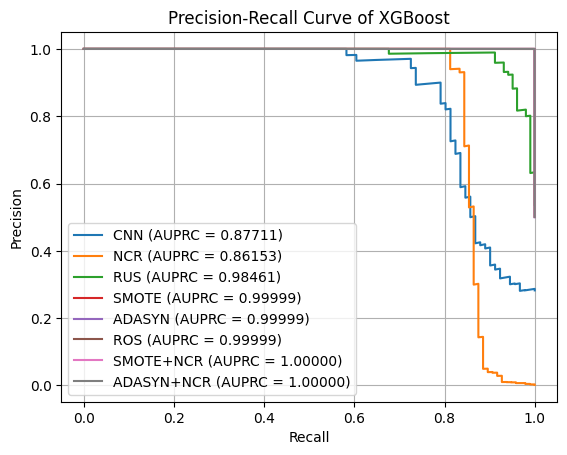

In [262]:
for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
    XGB.fit(x_tr,y_tr)
    
    y_preds=XGB.predict(x_ts)
    
    ap=average_precision_score(y_ts,y_preds)
    print(f"Average Precision Score ({name}): {ap:.5f}")
    
    precision, recall, _ = precision_recall_curve(y_ts, XGB.predict_proba(x_ts)[:, 1])
    
    auprc = auc(recall, precision)
    
    plt.plot(recall, precision, label=f'{name} (AUPRC = {auprc:.5f})')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of XGBoost')
plt.legend()
plt.grid(True)
plt.show()

Average Precision Score (CNN): 0.77231
Average Precision Score (NCR): 0.74015
Average Precision Score (RUS): 0.94489
Average Precision Score (SMOTE): 0.99979
Average Precision Score (ADASYN): 0.99973
Average Precision Score (ROS): 0.99995
Average Precision Score (SMOTE+NCR): 0.99988
Average Precision Score (ADASYN+NCR): 0.99993


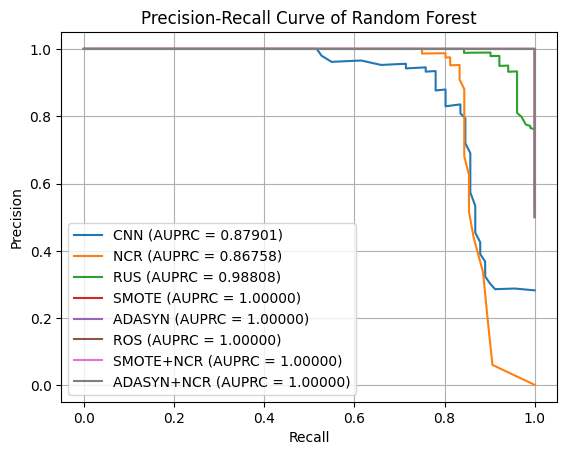

In [263]:
for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
    RF.fit(x_tr,y_tr)
    
    y_preds=RF.predict(x_ts)
    
    ap=average_precision_score(y_ts,y_preds)
    print(f"Average Precision Score ({name}): {ap:.5f}")
    
    precision, recall, _ = precision_recall_curve(y_ts, RF.predict_proba(x_ts)[:, 1])
    
    auprc = auc(recall, precision)
    
    plt.plot(recall, precision, label=f'{name} (AUPRC = {auprc:.5f})')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of Random Forest')
plt.legend()
plt.grid(True)
plt.show()

## Comparison of All Resampling Method Using F1-Score

--- Testing Dataset ---
-- Extreme Gradient Boosting --

Model fitting...
Model fitted - CNN!

Model fitting...
Model fitted - NCR!

Model fitting...
Model fitted - RUS!

Model fitting...
Model fitted - SMOTE!

Model fitting...
Model fitted - ADASYN!

Model fitting...
Model fitted - ROS!

Model fitting...
Model fitted - SMOTE+NCR!

Model fitting...
Model fitted - ADASYN+NCR!



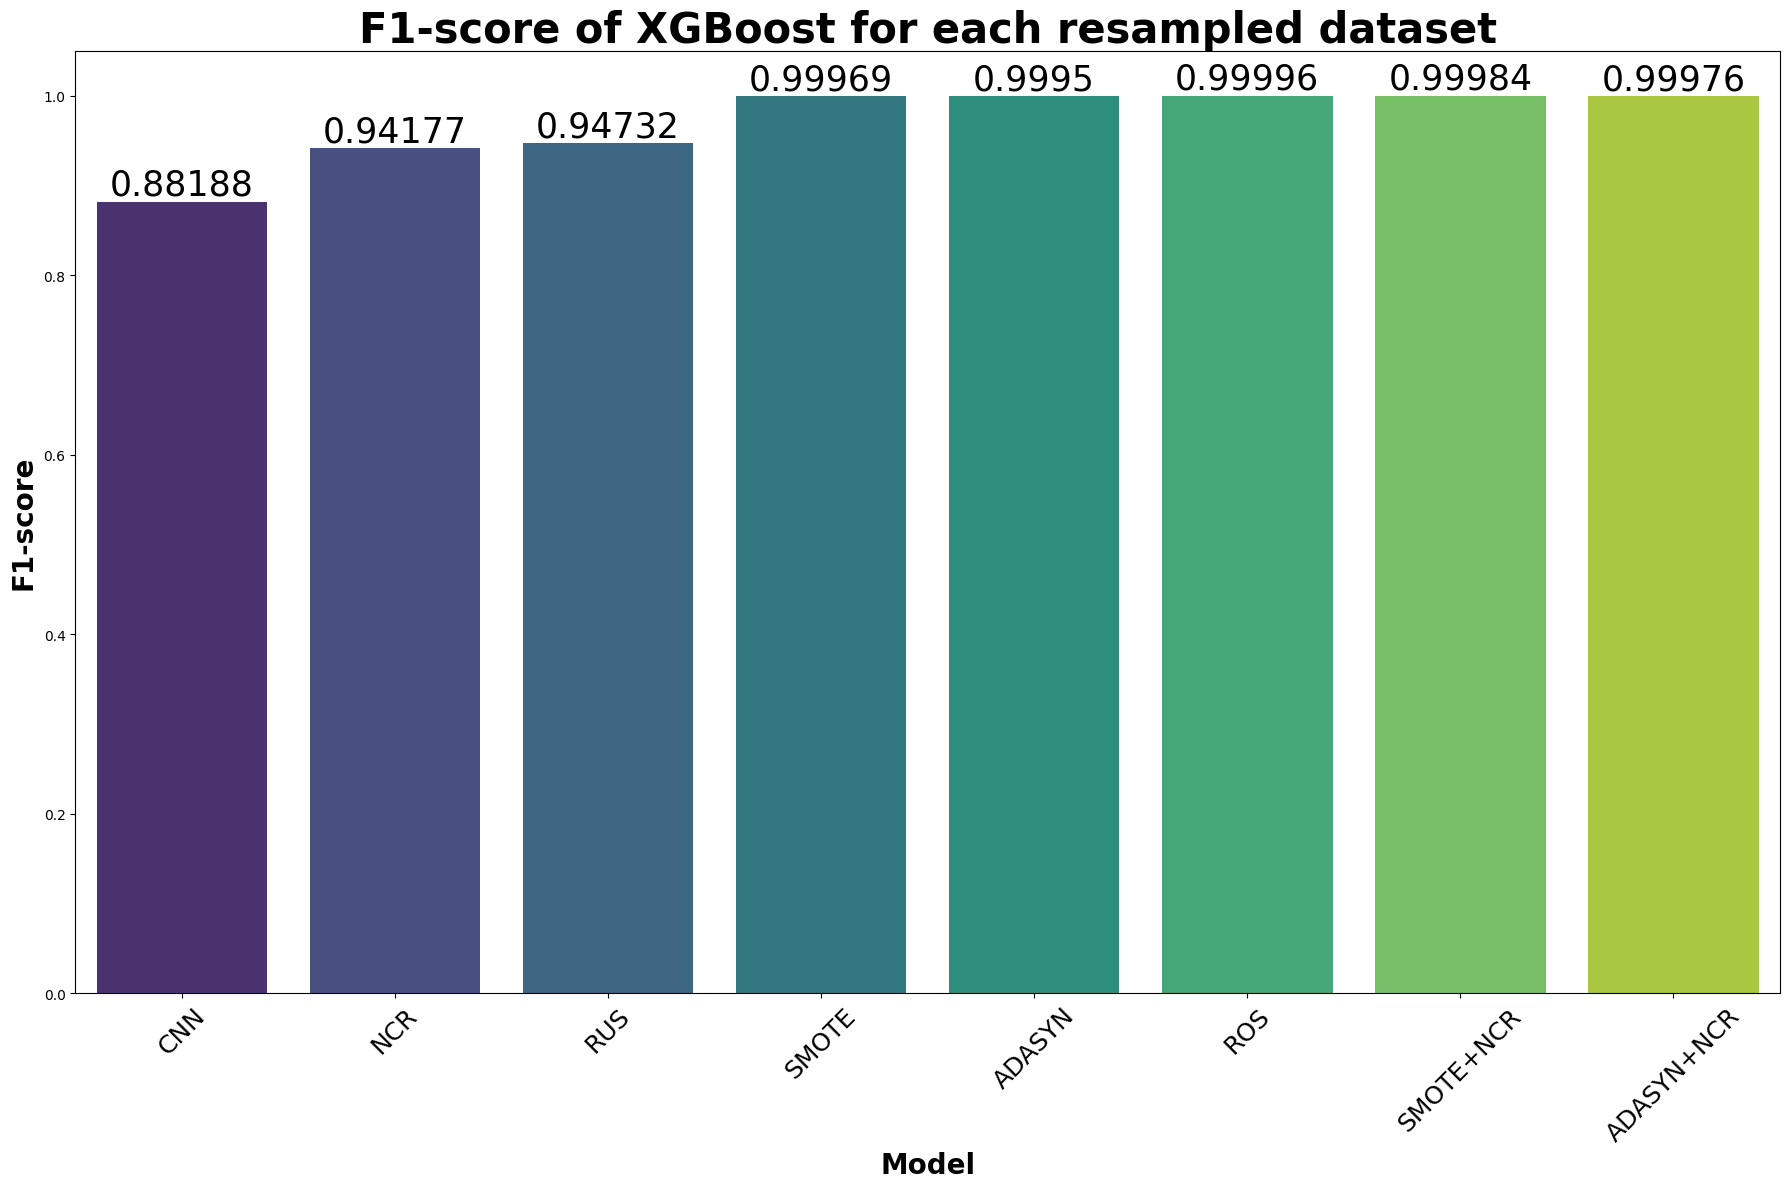

In [267]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

f1_scores = []

print("--- Testing Dataset ---")
print("-- Extreme Gradient Boosting --\n")

for name, x_tr, y_tr, x_ts,y_ts in List_x_y:
    print("Model fitting...")
    XGB.fit(x_tr, y_tr)
    print(f"Model fitted - {name}!\n")

    y_preds=XGB.predict(x_ts)

    # cr = classification_report(y_ts, y_preds,digits=5)
    f1_scores.append(f1_score(y_ts,y_preds,average="macro"))
    # _, _, f1, _ = precision_recall_fscore_support(y_ts, y_preds)
    # f1_scores.append(f1)
        
plt.figure(figsize=(18, 12))
sns.barplot(x=[name for name, _, _, _, _ in List_x_y], y=f1_scores, palette='viridis',hue=[name for name, _, _, _, _ in List_x_y])

plt.xlabel('Model', fontsize=20, fontweight='bold')
plt.ylabel('F1-score', fontsize=20, fontweight='bold')
plt.title('F1-score of XGBoost for each resampled dataset', fontsize=30, fontweight='bold')
plt.xticks(range(len(List_x_y)), [name for name, _, _, _, _ in List_x_y], fontsize=18,rotation=45)

for index, value in enumerate(f1_scores):
    plt.text(index, value, str(round(value, 5)), ha='center', va='bottom', fontsize=25)

plt.tight_layout()
plt.show()


--- Testing Dataset ---
-- Random Forest --

Model fitting...
Model fitted - CNN!

Model fitting...
Model fitted - NCR!

Model fitting...
Model fitted - RUS!

Model fitting...
Model fitted - SMOTE!

Model fitting...
Model fitted - ADASYN!

Model fitting...
Model fitted - ROS!

Model fitting...
Model fitted - SMOTE+NCR!

Model fitting...
Model fitted - ADASYN+NCR!



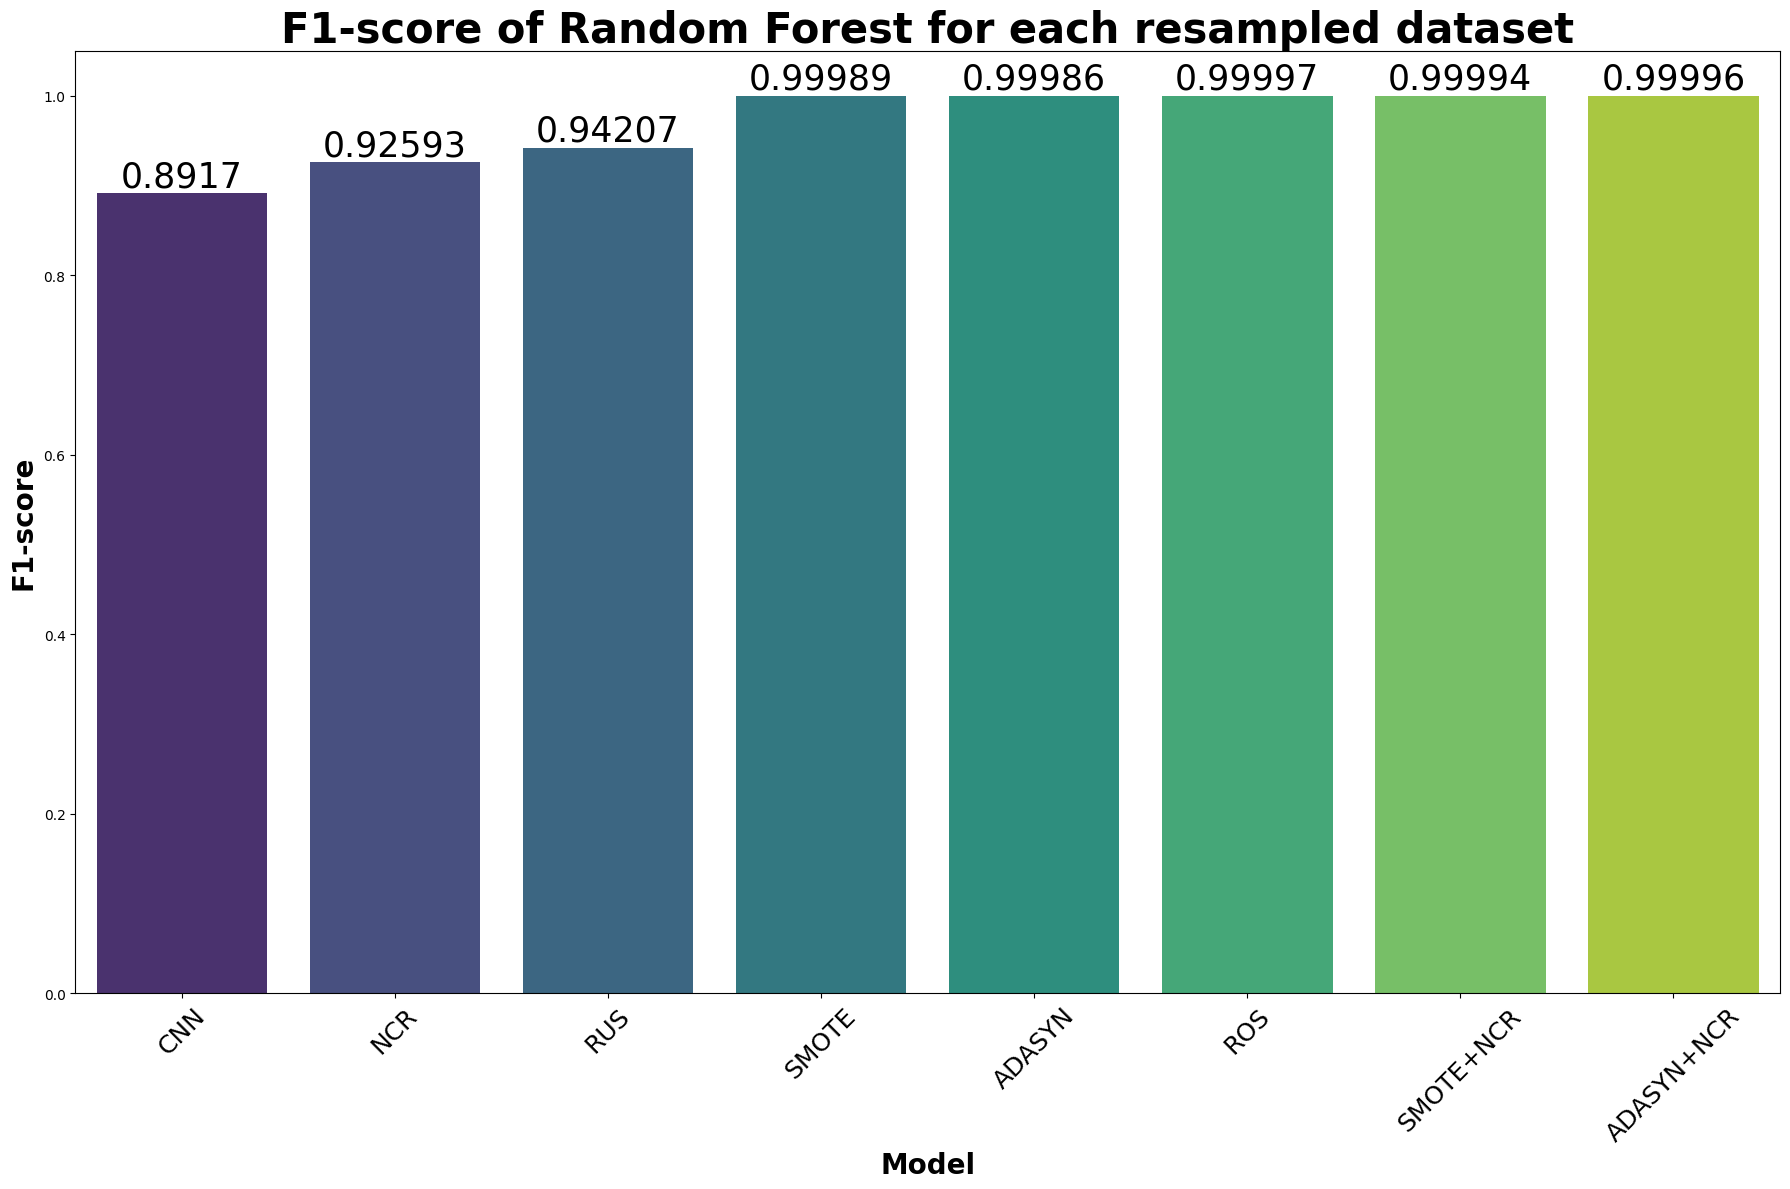

In [269]:
from sklearn.metrics import precision_recall_fscore_support

f1_scores = []

print("--- Testing Dataset ---")
print("-- Random Forest --\n")

for name, x_tr, y_tr, x_ts,y_ts in List_x_y:
    print("Model fitting...")
    RF.fit(x_tr, y_tr)
    print(f"Model fitted - {name}!\n")

    y_preds=RF.predict(x_ts)

    # cr = classification_report(y_ts, y_preds,digits=5)
    f1_scores.append(f1_score(y_ts,y_preds,average="macro"))
    f1=round(f1_score(y_ts,y_preds,average="macro"),5)
    # _, _, f1, _ = precision_recall_fscore_support(y_ts, y_preds)
    # f1_scores.append(f1)

# Membuat bar chart
plt.figure(figsize=(18, 12))
sns.barplot(x=[name for name, _, _, _, _ in List_x_y], y=f1_scores, palette='viridis',hue=[name for name, _, _, _, _ in List_x_y])

plt.xlabel('Model', fontsize=20, fontweight='bold')
plt.ylabel('F1-score', fontsize=20, fontweight='bold')
plt.title('F1-score of Random Forest for each resampled dataset', fontsize=30, fontweight='bold')
plt.xticks(range(len(List_x_y)), [name for name, _, _, _, _ in List_x_y], fontsize=18,rotation=45)

for index, value in enumerate(f1_scores):
    plt.text(index, value, str(round(value, 5)), ha='center', va='bottom', fontsize=25)

plt.tight_layout()
plt.show()


In [ ]:
# adasyn=ADASYN(sampling_strategy="auto",random_state=42)
# ncr = NeighbourhoodCleaningRule(sampling_strategy="all",n_neighbors=3,threshold_cleaning=0.5,n_jobs=-1)

# x_ad,y_ad=adasyn.fit_resample(x,y)

# print(x_ad.shape,y_ad.shape)
# print(x_ad.head())
# print(y_ad.head())
# print(y_ad.value_counts())

# x_adasyn_ncr,y_adasyn_ncr=ncr.fit_resample(x_ad,y_ad)
# x_train_adasyn_ncr,x_test_adasyn_ncr,y_train_adasyn_ncr,y_test_adasyn_ncr=train_test_split(x_adasyn_ncr,y_adasyn_ncr,test_size=0.2,random_state=42)

# List_x_y.append(("ADASYN+NCR",x_train_adasyn_ncr,y_train_adasyn_ncr,x_test_adasyn_ncr,y_test_adasyn_ncr))

In [ ]:
# print(x_adasyn_ncr.head())
# print(y_adasyn_ncr.head())
# print(x_adasyn_ncr.shape,y_adasyn_ncr.shape)
# print(y_adasyn_ncr.value_counts())

In [ ]:
# print(x_train_adasyn_ncr.head())
# print(y_train_adasyn_ncr.head())
# print(x_train_adasyn_ncr.shape,y_train_adasyn_ncr.shape)
# print(y_train_adasyn_ncr.value_counts())

In [270]:
for x in List_x_y:
    print(x[0])

CNN
NCR
RUS
SMOTE
ADASYN
ROS
SMOTE+NCR
ADASYN+NCR


In [271]:
x=dataset.drop("Class",axis=1)
y=dataset["Class"]
x.shape,y.shape

((283726, 29), (283726,))

In [272]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

x_train.shape,x_test.shape

((226980, 29), (56746, 29))

In [273]:
# from imblearn.under_sampling import NeighbourhoodCleaningRule,EditedNearestNeighbours

# ncr = NeighbourhoodCleaningRule(sampling_strategy="auto",n_neighbors=3,threshold_cleaning=0.9,n_jobs=-1)
# x_ncr,y_ncr = ncr.fit_resample(x,y)
# x_train_ncr,x_test_ncr,y_train_ncr,y_test_ncr=train_test_split(x_ncr,y_ncr,test_size=0.2,random_state=42)

# x_train_ncr.shape,y_train_ncr.shape

In [ ]:
# y_ncr.value_counts()

Class
0    282892
1       473
Name: count, dtype: int64

In [ ]:
# y_ncr.value_counts()

Class
0    282892
1       473
Name: count, dtype: int64

In [ ]:
# y_train_ncr.value_counts()

Class
0    226301
1       391
Name: count, dtype: int64

In [ ]:
# RandomForestClassifier()
# XGBClassifier()
# DecisionTreeClassifier()
# LogisticRegression()

## Fine-Tuning Parameter

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# # Inisialisasi XGBClassifier
# xgb = XGBClassifier()

# # Daftar parameter yang akan diuji
# param_grid = {
#     'n_estimators': [None,100,200,300],
#     'max_depth': [None,3, 5, 7],
#     'learning_rate': [None,0.1, 0.01]
# }

# # Inisialisasi GridSearchCV
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')

# # Melatih model
# grid_search.fit(x_train_smote, y_train_smote)

# # Menampilkan parameter terbaik
# print("Parameter terbaik:", grid_search.best_params_)

# # Menampilkan akurasi terbaik
# print("Akurasi terbaik:", grid_search.best_score_)

In [ ]:
# XGBB=XGBClassifier(n_estimators=300,max_depth=7)
# print(XGBB.get_params())

In [ ]:
# from sklearn.metrics import precision_recall_fscore_support
# from sklearn.metrics import f1_score
# f1_scores = []

# print("--- Testing Dataset ---")
# print("-- Extreme Gradient Boosting --\n")
# for name, x_tr, y_tr,x_ts,y_ts in List_x_y:
#     print("Model fitting...")
#     XGBB.fit(x_tr, y_tr)
#     print(f"Model fitted - {name}!\n")
    
#     y_preds = XGBB.predict(x_ts)

#     # cr = classification_report(y_ts, y_preds,digits=5)
#     f1_scores.append(f1_score(y_ts,y_preds,average="macro"))
#     # _, _, f1, _ = precision_recall_fscore_support(y_test, XGB.predict(x_test), average='binary')
#     # f1_scores.append(f1)

# plt.figure(figsize=(18, 12))
# sns.barplot(x=[name for name, _, _, _, _ in List_x_y], y=f1_scores, palette='viridis',hue=[name for name, _, _, _, _ in List_x_y])

# plt.xlabel('Model', fontsize=20, fontweight='bold')
# plt.ylabel('F1-score', fontsize=20, fontweight='bold')
# plt.title('F1-score of XGBoost for each resampled dataset', fontsize=30, fontweight='bold')
# plt.xticks(range(len(List_x_y)), [name for name, _, _, _, _ in List_x_y], fontsize=18,rotation=45)

# for index, value in enumerate(f1_scores):
#     plt.text(index, value, str(round(value, 5)), ha='center', va='bottom', fontsize=25)

# plt.tight_layout()
# plt.show()


In [ ]:
# print(f"--- Testing Dataset ---")
# print("-- Extreme Gradient Boosting --\n")
# for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
#     XGBB.fit(x_tr,y_tr)
    
#     y_preds=XGBB.predict(x_ts)
    
#     cm=confusion_matrix(y_ts,y_preds)
    
#     sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
#     plt.title(f"Confusion Matrix XGBoost ({name})",color="darkorange",fontsize=16)
#     plt.xlabel("Predicted Label",fontsize=14)
#     plt.ylabel("Actual Label",fontsize=14)
#     plt.tight_layout()
#     plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Inisialisasi RandomForestClassifier
# rf = RandomForestClassifier()

# # Daftar parameter yang akan diuji
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'bootstrap': [True, False]
# }

# # Inisialisasi GridSearchCV
# grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# # Melatih model
# grid_search_rf.fit(x_train_smote, y_train_smote)

# # Menampilkan parameter terbaik
# print("Parameter terbaik:", grid_search_rf.best_params_)

# # Menampilkan akurasi terbaik
# print("Akurasi terbaik:", grid_search_rf.best_score_)


In [ ]:
RFF=RandomForestClassifier(bootstrap=False)

In [ ]:
# from sklearn.metrics import precision_recall_fscore_support
# from sklearn.metrics import f1_score
# f1_scores = []

# print("--- Testing Dataset ---")
# print("-- Random Forest --\n")
# for name, x_tr, y_tr,x_ts,y_ts in List_x_y:
#     print("Model fitting...")
#     RFF.fit(x_tr, y_tr)
#     print(f"Model fitted - {name}!\n")
    
#     y_preds = RFF.predict(x_ts)

#     # cr = classification_report(y_ts, y_preds,digits=5)
#     f1_scores.append(f1_score(y_ts,y_preds,average="macro"))
#     # _, _, f1, _ = precision_recall_fscore_support(y_test, XGB.predict(x_test), average='binary')
#     # f1_scores.append(f1)

# plt.figure(figsize=(18, 12))
# sns.barplot(x=[name for name, _, _, _, _ in List_x_y], y=f1_scores, palette='viridis',hue=[name for name, _, _, _, _ in List_x_y])

# plt.xlabel('Model', fontsize=20, fontweight='bold')
# plt.ylabel('F1-score', fontsize=20, fontweight='bold')
# plt.title('F1-score of Randon Forest for each resampled dataset', fontsize=30, fontweight='bold')
# plt.xticks(range(len(List_x_y)), [name for name, _, _, _, _ in List_x_y], fontsize=18,rotation=45)

# for index, value in enumerate(f1_scores):
#     plt.text(index, value, str(round(value, 5)), ha='center', va='bottom', fontsize=25)

# plt.tight_layout()
# plt.show()

In [ ]:
# print(f"--- Testing Dataset ---")
# print("-- Random Forest --\n")
# for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
#     RFF.fit(x_tr,y_tr)
    
#     y_preds=RFF.predict(x_ts)
    
#     cm=confusion_matrix(y_ts,y_preds)
    
#     sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
#     plt.title(f"Confusion Matrix Random Forest ({name})",color="darkorange",fontsize=16)
#     plt.xlabel("Predicted Label",fontsize=14)
#     plt.ylabel("Actual Label",fontsize=14)
#     plt.tight_layout()
#     plt.show()